# ✅ **Task 2: Data Cleaning & Exploratory Data Analysis (EDA)**

#### 🔹 Task Objective:

> Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice (e.g., Titanic dataset).
> Explore relationships between variables and identify **patterns and trends**.

---

### 🗂️ We'll use the **Titanic dataset** again because:

* It’s rich with both **categorical** and **continuous** variables
* Good for demonstrating missing value treatment, correlations, and visualizations
* It’s a classic dataset used in real-world interviews and case studies

---

### 📌 What We'll Do in Task 2:

1. Load and inspect the dataset
2. Clean the data (missing values, dtypes)
3. Perform Exploratory Data Analysis:

   * Univariate (distribution of each column)
   * Bivariate (relationship between columns)
   * Insights and patterns

---

In [3]:
# Task 2: Data Cleaning and EDA using Titanic Dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = sns.load_dataset("titanic")

# Display basic info
print("🔹 Dataset Info:")
print(df.info())

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [5]:
# View first few rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 🔹 Step 1: Handle Missing Values

In [8]:
# Checking missing values
print("🔹 Missing Values:")
print(df.isnull().sum())

🔹 Missing Values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [10]:
# Drop columns with too many missing values (e.g., 'deck')
df.drop(columns=['deck'], inplace=True)

# Fill missing age with median
df['age'] = df['age'].fillna(df['age'].median())

# Drop remaining rows with missing values (optional)
df.dropna(inplace=True)

# Confirm changes
print("✅ Missing values handled.")

✅ Missing values handled.


### 🔹 Step 2: Univariate Analysis

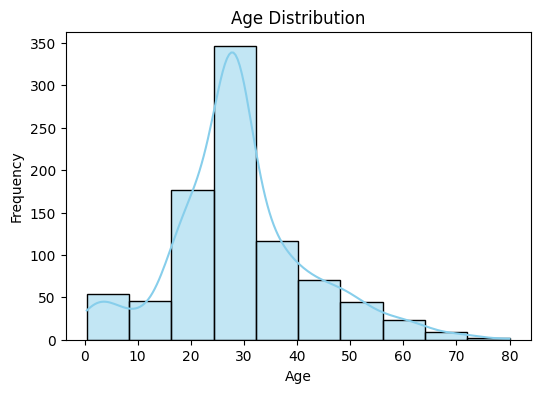

In [13]:
# Plot age distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

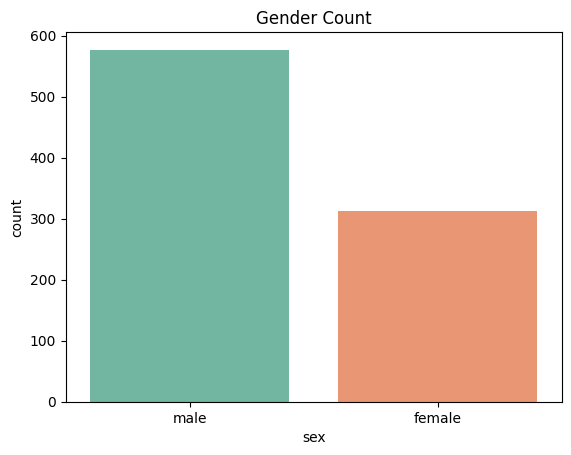

In [15]:
# Plot gender count
sns.countplot(x='sex', hue='sex', data=df, palette='Set2', legend=False)
plt.title('Gender Count')
plt.show()


### 🔹 Step 3: Bivariate Analysis

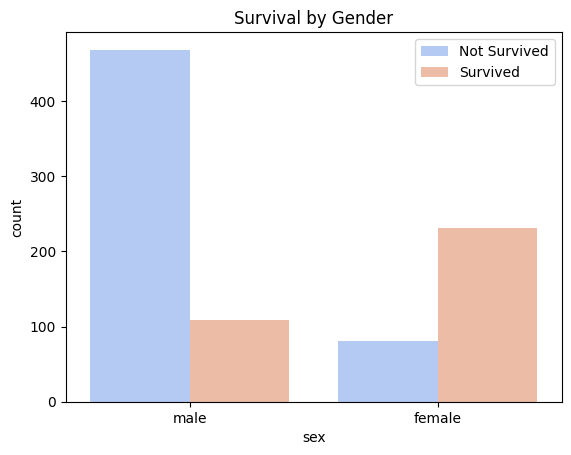

In [18]:
# Survival rate by gender
sns.countplot(x='sex', hue='survived', data=df, palette='coolwarm')
plt.title("Survival by Gender")
plt.legend(labels = ['Not Survived', 'Survived'])
plt.show()

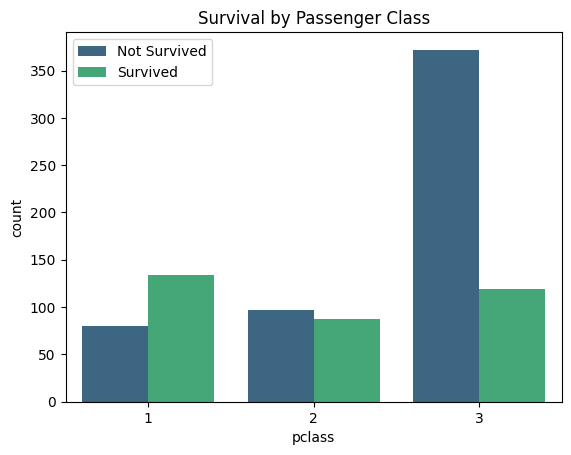

In [20]:
# Survival rate by class
sns.countplot(x='pclass', hue='survived', data=df, palette='viridis')
plt.title('Survival by Passenger Class')
plt.legend(labels=['Not Survived', 'Survived'])
plt.show()

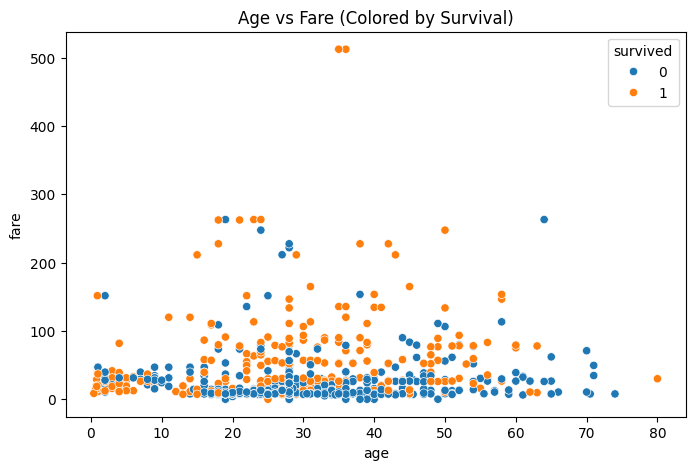

In [22]:
# Age vs. Fare scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title('Age vs Fare (Colored by Survival)')
plt.show()

### 📝 Sample Insights for Your Report

> * Majority of passengers were aged 20–30.
> * Males were more frequent than females, but **females had higher survival rates**.
> * Passengers in **1st class had higher survival** chances compared to 3rd class.
> * Ticket fare increases with age for survivors, indicating wealthier, older passengers had better survival.

---
